In [44]:
import cv2, dlib,numpy as np,matplotlib.pyplot as plt
from scipy.spatial import distance
PREDICTOR_PATH = "C:/Users/NRRU/Desktop/python/models/dlib/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(PREDICTOR_PATH) 
font = cv2.FONT_HERSHEY_SIMPLEX
def get_landmarks(im):
    rects = detector(im, 1)
    if len(rects) > 1:
        raise TooManyFaces
    if len(rects) == 0:
        raise NoFaces
    return np.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()]) 
def face(fn):
    global d, img, p
    d = []
    img = cv2.imread(fn)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    z = get_landmarks(img)
    p = []
    for idx, point in enumerate(z):
        pos = (point[0,0], point[0,1])
        p.append(pos)
#         cv2.putText(img, str(idx),pos,fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,fontScale=0.4,color=(0, 0, 255))
#         cv2.circle(img, pos, 2, color=(0, 255, 0),thickness=2)
    
    dist_face = lambda a,b: "คนในภาพหันไปด้านซ้าย" if a < b  else ("คนในภาพหน้าตรง" if eucli(a,b) < 10 else "คนในภาพหันไปด้านขวา")
    dist_eye_left = lambda a: "คนในภาพหลับตาซ้าย" if a < 10  else "คนในภาพลืมตาซ้าย"
    dist_eye_right = lambda a: "คนในภาพหลับตาขวา" if a < 10  else "คนในภาพลืมตาขวา"
    dist_mouse = lambda a: "คนในภาพหุบปาก" if a < 10  else "คนในภาพอ้าปาก"
    eucli = lambda a,b:distance.euclidean(a, b)
    fleft = eucli(p[27],p[39])
    fright = eucli(p[27],p[42])
    print(dist_face(fleft,fright),"เอียงซ้าย",fleft,"เอียงขวา",fright,"ระยะห่าง",eucli(fleft,fright))
    print(dist_eye_left(eucli(p[37],p[41])),eucli(p[37],p[41]))
    print(dist_eye_right(eucli(p[43],p[47])),eucli(p[43],p[47]))
    print(dist_mouse(eucli(p[62],p[66])),eucli(p[62],p[66]))
    plt.imshow(img)

คนในภาพหันไปด้านขวา เอียงซ้าย 54.1294744109 เอียงขวา 26.4764045897 ระยะห่าง 27.653069821149977
คนในภาพหลับตาซ้าย 9.05538513814
คนในภาพลืมตาขวา 12.1655250606
คนในภาพหุบปาก 1.0


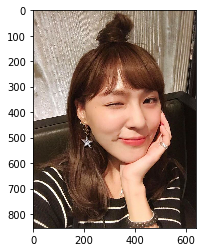

In [45]:
img4 = "C:/Users/NRRU/Desktop/python/tom8.jpg"
img5 = "C:/Users/NRRU/Desktop/python/tom5.jpg"
img6 = "C:/Users/NRRU/Desktop/python/tom6.jpg"
img7 = "C:/Users/NRRU/Desktop/python/tom7.jpg"
img8 = "C:/Users/NRRU/Desktop/python/face.jpg"
img9 = "C:/Users/NRRU/Desktop/python/person.jpg" 
face(img9)